# LIF Model

In [82]:
#importing needed libraries
import numpy as np
from matplotlib.pyplot import *
import random
import math
from statistics import mode

# LIF Class

In [174]:
class LIF:
    def i_interval(i, time, start = 30,end = 70):
        if start < time < end:
            return i
        return 0
        
    def i_constant(c, time):
        return c
    
    def i_step(i, time, s1 = 5, e1 = 40, s2 = 45, e2 = 90):
        if s1 < time < e1 or s2 < time < e2:
            return i
        return 0
    
    def __init__(self, i = 5, time_interval = 100, dt = 0.1, i_func = i_interval, u_rest = 0, R = 1, C = 1, threshold = 1, 
                save_name="none"):
        self.time_interval = time_interval 
        self.dt = dt
        self.i_func = i_func
        self.u_rest = u_rest
        self.R = R
        self.C = C
        self.i = i
        self.threshold = threshold
        self.u = []
        self.i_init = []
        self.timer = []
        self.save_name = save_name
        
    def lif_function(self):
        self.timer = np.arange(0, self.time_interval + self.dt, self.dt)
        u = [self.u_rest for i in range(len(self.timer))]
        self.i_init = [self.i_func(5, j) for j in self.timer]
        const = self.R * self.C
        for t in range(len(self.timer)):
            u[t] = u[t-1] + (((-u[t-1] + self.u_rest) + self.R * self.i_init[t]) * self.dt)/const
            if u[t] >= self.threshold or u[t] < self.u_rest:
                u[t] = self.u_rest
        self.u = u
        
    def timee(self, i_const=5):
        time_periods = []
        const = self.R * self.C
        u = [self.u_rest for i in range(len(self.timer))]
        prev_period = 0
        for t in range(len(self.timer)):
            u[t] = u[t-1] + (((-u[t-1] + self.u_rest) + self.R * i_const) * self.dt)/const
            if u[t] >= self.threshold :
                u[t] = self.u_rest
                time_periods.append(self.timer[t] - prev_period)
                print(self.timer[t] - prev_period)
                prev_period = self.timer[t]
       
            
        #return mode(time_periods)  
        
    def plot_U_t(self):
        fig = figure(num=None, figsize=(20, 10))
        fig.suptitle(str(self.save_name)+'\n\n\n')
        subplot(221)
        plot(self.timer, self.u)
        ylabel('U')
        xlabel('Time')
        title('U - Time')
        grid(True)
    
    def plot_i_t(self):
        fig = figure(num=None, figsize=(20, 10))
        fig.suptitle(str(self.save_name)+'\n\n\n')
        subplot(221)
        plot(self.timer, self.i_init)
        ylabel('I')
        xlabel('Time')
        title('I - Time')
        grid(True)
    
    def plot_F_I(self):
        fig = figure(num=None, figsize=(20, 20))
        fig.suptitle(str(self.save_name)+'\n\n\n')   
        
        const = self.R * self.C
        i_x = np.arange(0, max(self.i_init), self.dt)
        i_y = [0 for _ in range(len(i_x))]
          
        for j in range(len(i_x)):
            try:
                i_y[j] = 1 / (self.times(i_const=i_x[j]))
            except:
                i_y[j] = 0            
        subplot(221)
        plot(i_x, i_y)
        ylabel('F')
        xlabel('I')
        title('F - I')
        grid(True) 

    

# Ploting

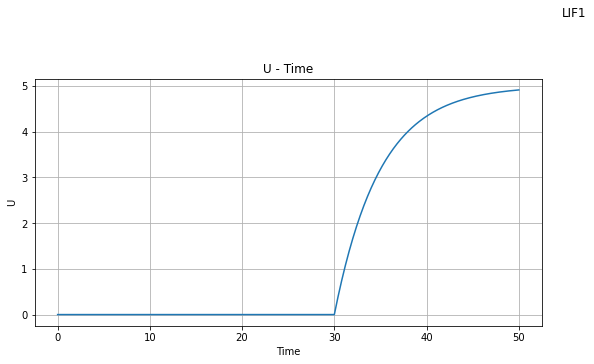

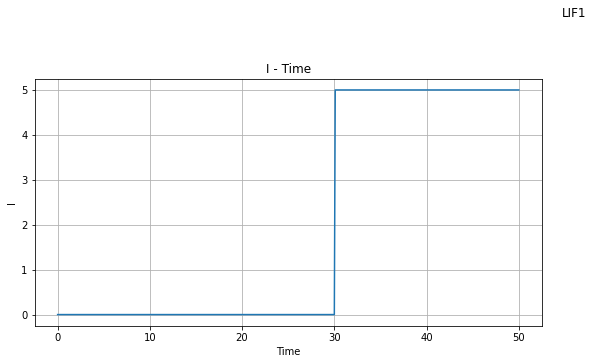

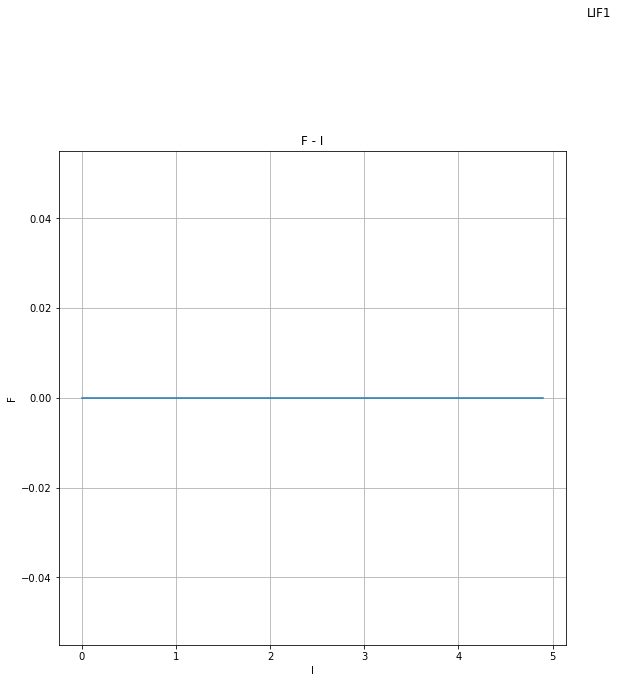

In [175]:
lif1 = LIF(i = 2, time_interval=50, C=5, threshold=5, save_name="LIF1")
lif1.lif_function()
lif1.plot_U_t()
lif1.plot_i_t()
lif1.plot_F_I()

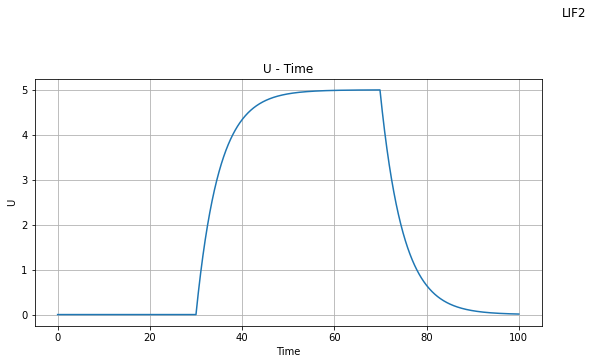

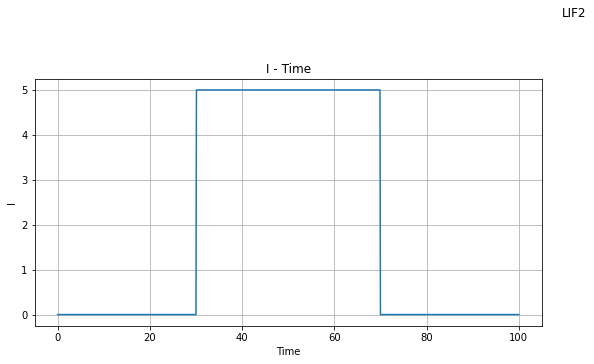

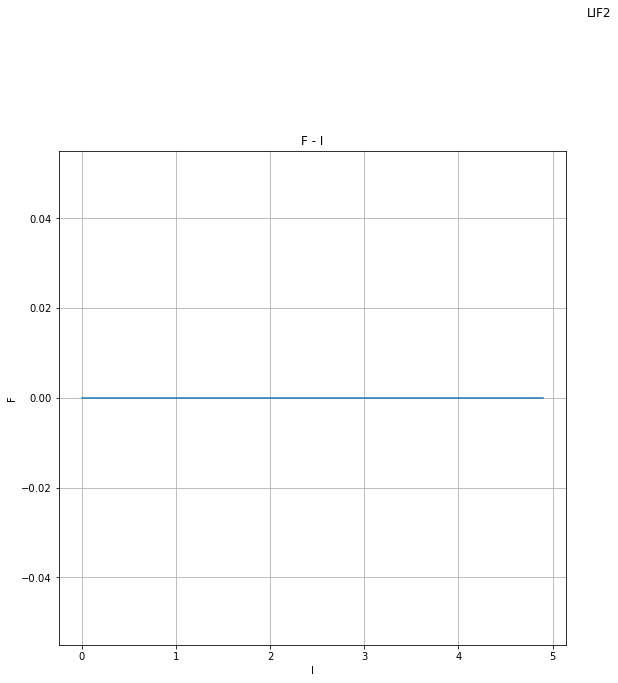

In [176]:
lif2 = LIF(i = 2, time_interval=100, C=5, threshold=5, save_name="LIF2")
lif2.lif_function()
lif2.plot_U_t()
lif2.plot_i_t()
lif2.plot_F_I()

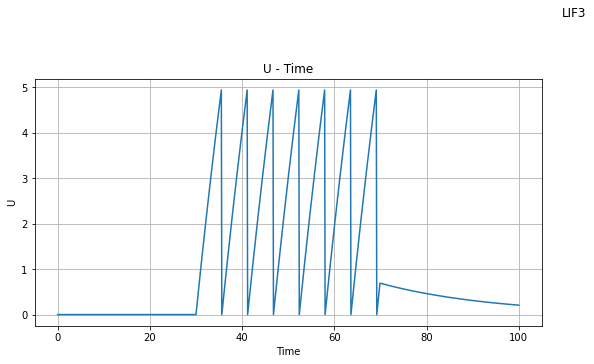

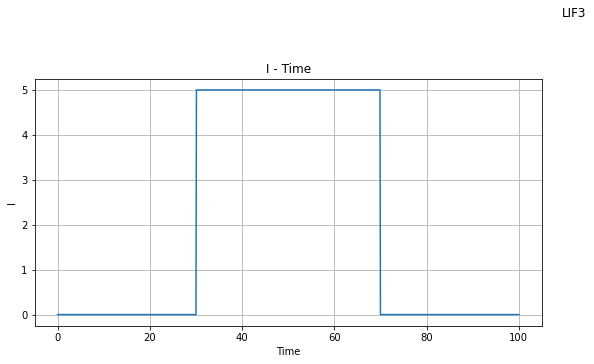

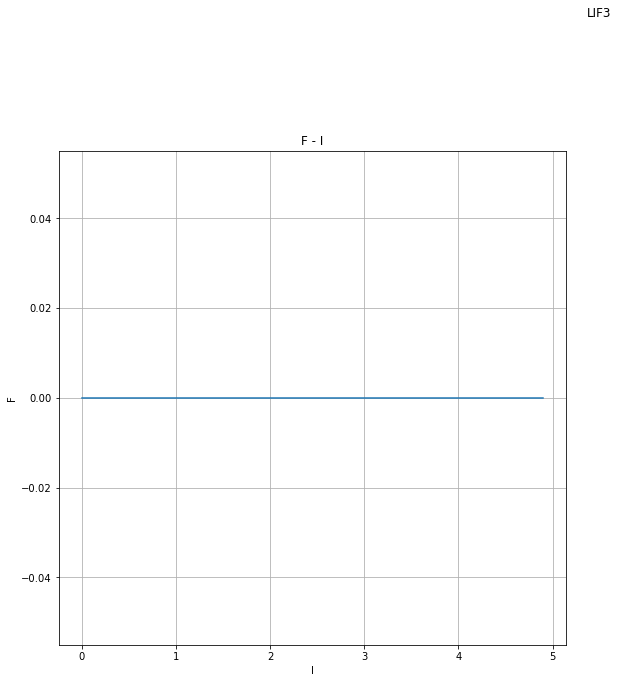

In [177]:
lif3 = LIF(i = 2, time_interval=100, R=5, C=5, threshold=5, save_name="LIF3")
lif3.lif_function()
lif3.plot_U_t()
lif3.plot_i_t()
lif3.plot_F_I()

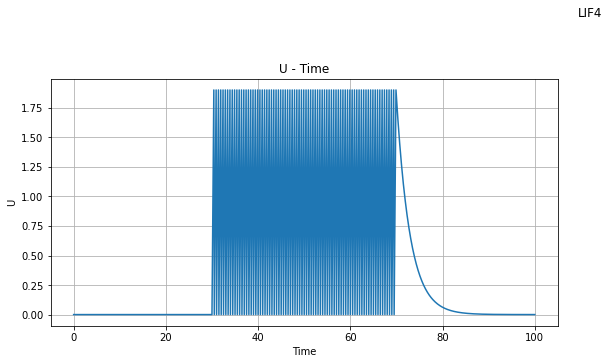

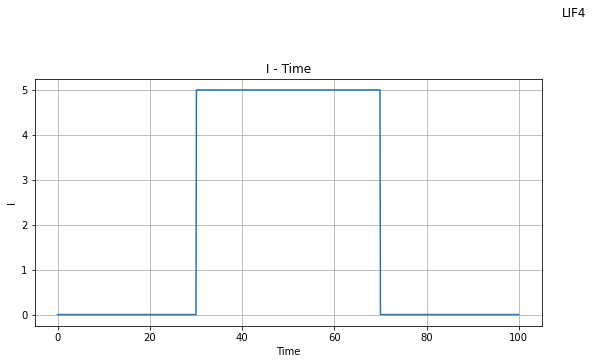

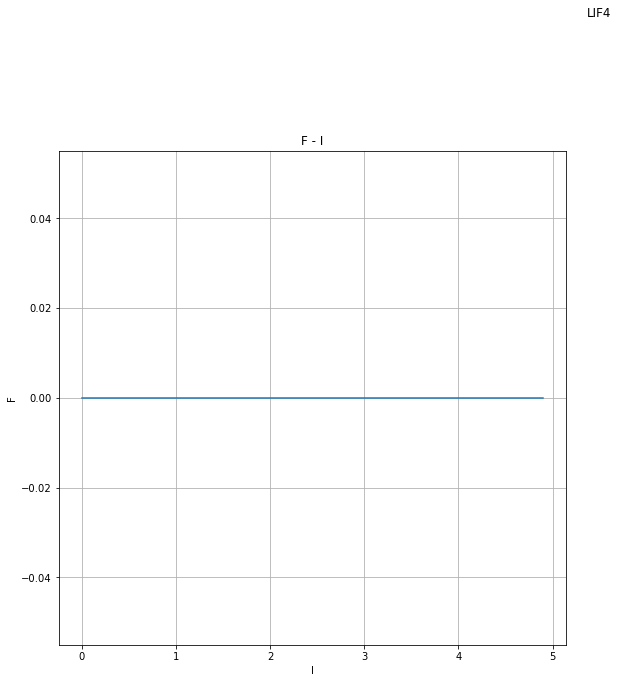

In [179]:
lif4 = LIF(i = 5, time_interval=100, R=3, C=1, threshold=2, save_name="LIF4")
lif4.lif_function()
lif4.plot_U_t()
lif4.plot_i_t()
lif4.plot_F_I()

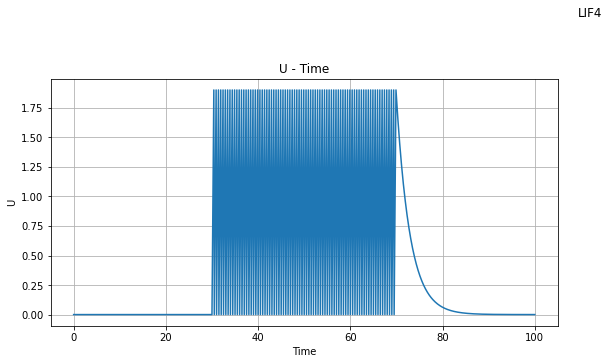

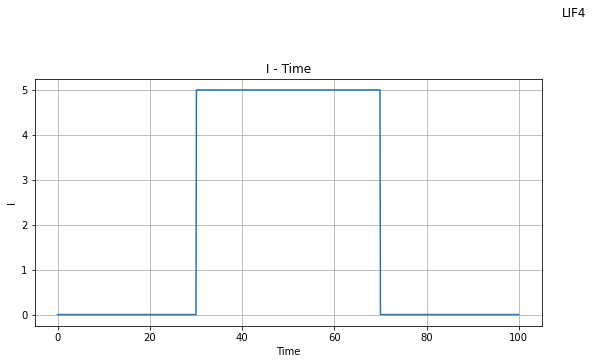

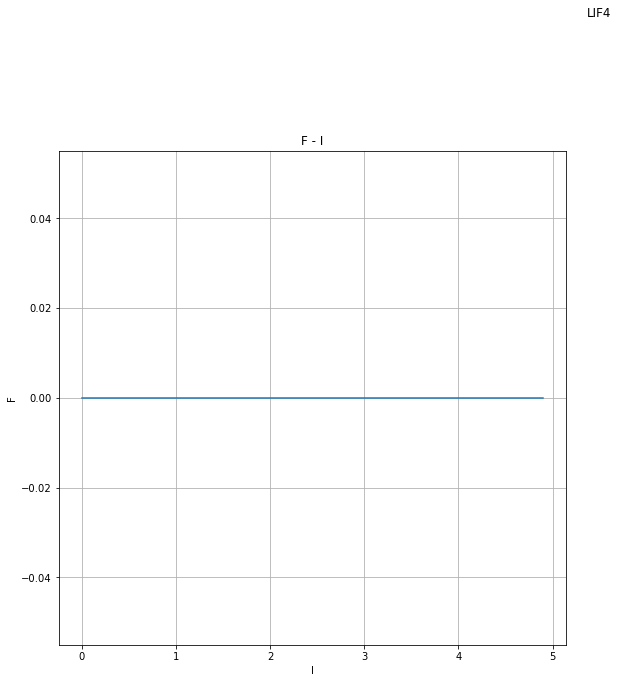

In [180]:
lif5 = LIF(i = 5, time_interval=50, u_rest = 0, R=1, C=5, threshold=5, save_name="LIF4")
lif4.lif_function()
lif4.plot_U_t()
lif4.plot_i_t()
lif4.plot_F_I()